# Class 11: Intro to Data Visualization

Plan for today:
- Quick review of joining DataFrames
- Data visualization using matplotlib


## Notes on the class Jupyter setup

If you have the *ydata123_2023e* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [39]:
import YData

# YData.download.download_class_code(11)   # get class code    
# YData.download.download_class_code(11, TRUE) # get the code with the answers 

YData.download.download_data("dow.csv")
YData.download.download_data("monthly_egg_prices.csv")
YData.download.download_data("monthly_wheat_prices.csv")
YData.download_data("US_Gasoline_Prices_Weekly.csv")
YData.download.download_data("nba_salaries_2015_16.csv")
YData.download.download_data("nba_position_names.csv")


The file `dow.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `monthly_egg_prices.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `monthly_wheat_prices.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `US_Gasoline_Prices_Weekly.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nba_salaries_2015_16.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nba_position_names.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


There are also similar functions to download the homework:

In [40]:
# YData.download.download_homework(5)  # downloads the homework 

If you are using colabs, you should install polars and the YData packages by uncommenting and running the code below.

In [41]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [42]:
# from google.colab import drive
# drive.mount('/content/drive')

In [43]:
import pandas as pd
import statistics
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

## "Joining" DataFrames example

Let's go through the exact example I had in my slides so we can understanding the difference between the differnt types of joins. 

Below I create the DataFrames "by hand". 

In [44]:
x_df = pd.DataFrame({"key_x": [1, 2, 3], "val_x": ["x1", "x2", "x3"]})

x_df


,key_x,val_x
0,1,x1
1,2,x2
2,3,x3


In [45]:
y_df = pd.DataFrame({"key_y": [1, 2, 4], "val_y": ["y1", "y2", "y3"]})

y_df

,key_y,val_y
0,1,y1
1,2,y2
2,4,y3


In [46]:
# left join keeps all the rows in the left DataFrame and joins on maching rows in the right DataFrame

merged_df = x_df.merge(y_df, how = "left", left_on = "key_x", right_on = "key_y")

merged_df

#merged_df.drop("key_y", axis = 1)

,key_x,val_x,key_y,val_y
0,1,x1,1.0,y1
1,2,x2,2.0,y2
2,3,x3,NaN,NaN


In [47]:
# right join keeps all the rows in the right DataFrame and joins on maching rows in the left DataFrame

x_df.merge(y_df, how = "right", left_on = "key_x", right_on = "key_y")


,key_x,val_x,key_y,val_y
0,1.0,x1,1,y1
1,2.0,x2,2,y2
2,NaN,NaN,4,y3


In [48]:
# inner join keeps only the rows where the keys match in both DataFrames

x_df.merge(y_df, how = "inner", left_on = "key_x", right_on = "key_y")



,key_x,val_x,key_y,val_y
0,1,x1,1,y1
1,2,x2,2,y2


In [49]:
# outer (full) join keeps all rows in both DataFrames

x_df.merge(y_df, how = "outer", left_on = "key_x", right_on = "key_y")


,key_x,val_x,key_y,val_y
0,1.0,x1,1.0,y1
1,2.0,x2,2.0,y2
2,3.0,x3,NaN,NaN
3,NaN,NaN,4.0,y3


#### The .join() method

In [50]:
# if we set the indexes of the data frames, we can use the .join() methods instead of the .merge() method
x_df2 = x_df.set_index("key_x")

x_df2 

,val_x
key_x,
1,x1
2,x2
3,x3


In [51]:
y_df2 = y_df.set_index("key_y")

y_df2

,val_y
key_y,
1,y1
2,y2
4,y3


In [52]:
# Using the join method we do not need to specify on_left and on_right arguments because the key is the index

x_df2.join(y_df2, how = "left")


,val_x,val_y
key_x,,
1,x1,y1
2,x2,y2
3,x3,NaN


#### Example: Spelling out NBA position names

As you will recall, our NBA salaries DataFrame had the different positions listed as abbreviations such as "C" and "PG". 

Often it is hard to tell what these abbreviations (or codes) mean, so a common use of joining is to join on to a table a list of longer names that give more meaning to abbreviations. 

Below we load our `nba_salaries` DataFrame along with a `nba_positions` DataFrame which has information about how each position abbreviation maps on to the position's full name.

Let's merge these DataFrames together so that our `nba_salaries` DataFrame has the full position names!



In [53]:
nba_salaries = pd.read_csv("nba_salaries_2015_16.csv")

nba_salaries.head(3)


,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250


In [54]:
nba_positions = pd.read_csv("nba_position_names.csv")
nba_positions

,Position Abbreviation,Position Name
0,PG,Point Guard
1,SG,Shooting Guard
2,C,Center
3,SF,Small Forward
4,PF,Power Forward


In [55]:
# merge the DataFrames together so each player's position is the full position name

nba_improved = nba_salaries.merge(nba_positions, 
                                  how = "left", 
                                  left_on = "POSITION", 
                                  right_on = "Position Abbreviation")

nba_improved.head(5)

,PLAYER,POSITION,TEAM,SALARY,Position Abbreviation,Position Name
0,Paul Millsap,PF,Atlanta Hawks,18.671659,PF,Power Forward
1,Al Horford,C,Atlanta Hawks,12.000000,C,Center
2,Tiago Splitter,C,Atlanta Hawks,9.756250,C,Center
3,Jeff Teague,PG,Atlanta Hawks,8.000000,PG,Point Guard
4,Kyle Korver,SG,Atlanta Hawks,5.746479,SG,Shooting Guard


In [56]:
# remove unnecessary columns using the .drop(colums = )  method
nba_improved.drop(columns = ["POSITION", "Position Abbreviation"])

,PLAYER,TEAM,SALARY,Position Name
0,Paul Millsap,Atlanta Hawks,18.671659,Power Forward
1,Al Horford,Atlanta Hawks,12.000000,Center
2,Tiago Splitter,Atlanta Hawks,9.756250,Center
3,Jeff Teague,Atlanta Hawks,8.000000,Point Guard
4,Kyle Korver,Atlanta Hawks,5.746479,Shooting Guard
...,...,...,...,...
412,Gary Neal,Washington Wizards,2.139000,Point Guard
413,DeJuan Blair,Washington Wizards,2.000000,Center
414,Kelly Oubre Jr.,Washington Wizards,1.920240,Small Forward
415,Garrett Temple,Washington Wizards,1.100602,Shooting Guard


![pandas](https://image.goat.com/transform/v1/attachments/product_template_additional_pictures/images/071/445/310/original/719082_01.jpg.jpeg)

## Data visualization!

Let's go through different ways to visualize data. To do this let's look again and Egg and Gas prices.


In [57]:
egg_prices = pd.read_csv("monthly_egg_prices.csv", parse_dates = [0])
gas_prices = pd.read_csv("US_Gasoline_Prices_Weekly.csv", parse_dates = [0])

display(egg_prices.head(3))

gas_prices.head(3)

,DATE,Price
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812


,Week,DollarsPerGallon
0,2023-01-23,3.519
1,2023-01-16,3.416
2,2023-01-09,3.366


To start with, let's get a little more practice joining DataFrames by joining the egg and gas prices together into a single DataFrame. 

Let's do an inner join to only keep the dates where we have prices for both eggs and gas. 

In [58]:
# merge the egg and gas prices
prices = egg_prices.merge(gas_prices, 
                          how = "inner", 
                          left_on = "DATE",
                          right_on = "Week")

prices.head(3)


,DATE,Price,Week,DollarsPerGallon
0,1993-11-01,0.917,1993-11-01,1.084
1,1994-08-01,0.895,1994-08-01,1.130
2,1995-05-01,0.819,1995-05-01,1.194


Let's also clean up our prices data by only keeping the columns we need, and renaming them to more meaningful names.

In [59]:
# only keep the columns we need
prices = prices[["Week", "Price", "DollarsPerGallon"]]

# rename the columns to have more meaningful names
prices = prices.rename(columns = {"Price": "Eggs", "DollarsPerGallon":"Gas"})

prices.head(3)


,Week,Eggs,Gas
0,1993-11-01,0.917,1.084
1,1994-08-01,0.895,1.130
2,1995-05-01,0.819,1.194


Now we are ready to start visualizing the data!

Let's start by creating line plots usin gthe `plot.plot()` function!

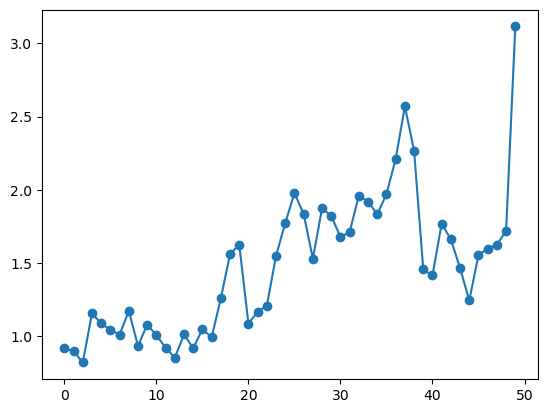

In [60]:
# create a line plot of egg prices, and also include a circle marker at each point 
plt.plot(prices["Eggs"], "-o");

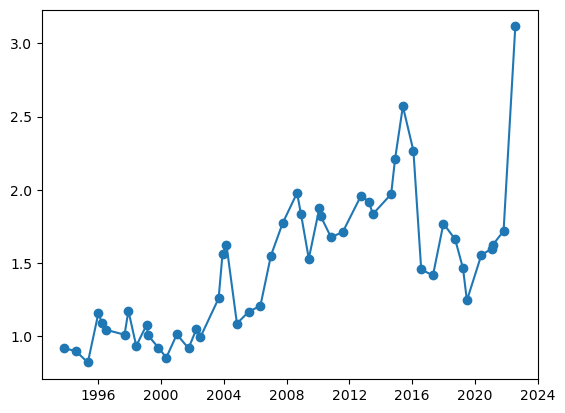

In [61]:
# Let's have the x-axis be the actual dates
plt.plot(prices["Week"], prices["Eggs"], "-o");

What is [wrong](https://xkcd.com/833/) with these plots???


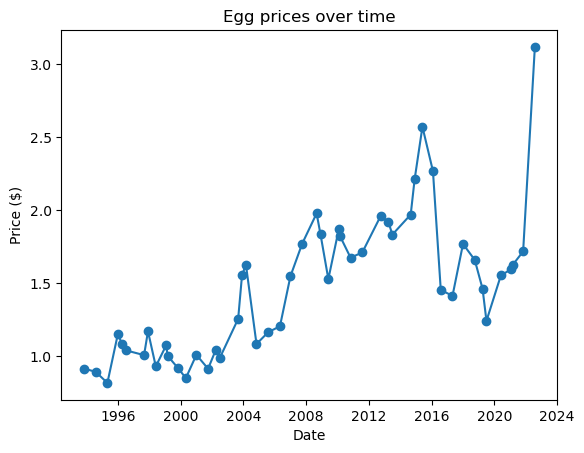

In [62]:
# Let's make this better!
plt.plot(prices["Week"], prices["Eggs"], "-o");
plt.ylabel("Price ($)");
plt.xlabel("Date");
plt.title("Egg prices over time");

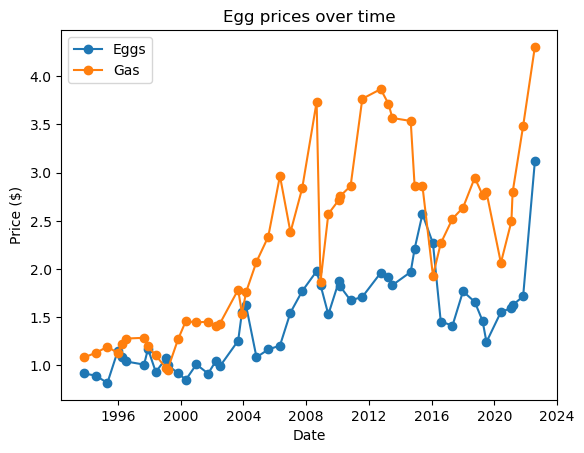

In [63]:
# Let's compare egg and gas prices on the same plot

plt.plot(prices["Week"], prices["Eggs"], "-o", label = "Eggs");
plt.plot(prices["Week"], prices["Gas"], "-o", label = "Gas");

plt.ylabel("Price ($)");
plt.xlabel("Date");
plt.title("Egg prices over time");
plt.legend();


In [64]:
# Side note: Can you use pandas methods to see if there are there any weeks where Eggs cost more than Gas? 

prices2 = prices.copy()

prices2["Price Diff"] = prices2["Gas"] - prices2["Eggs"]

prices2.sort_values("Price Diff").head(7)

,Week,Eggs,Gas,Price Diff
38,2016-02-01,2.267,1.932,-0.335
9,1999-02-01,1.078,0.971,-0.107
10,1999-03-01,1.005,0.955,-0.050
18,2003-12-01,1.559,1.533,-0.026
3,1996-01-01,1.155,1.129,-0.026
7,1997-12-01,1.172,1.197,0.025
26,2008-12-01,1.834,1.870,0.036


### Histograms 

We can create histograms using the `plt.hist()` function. 


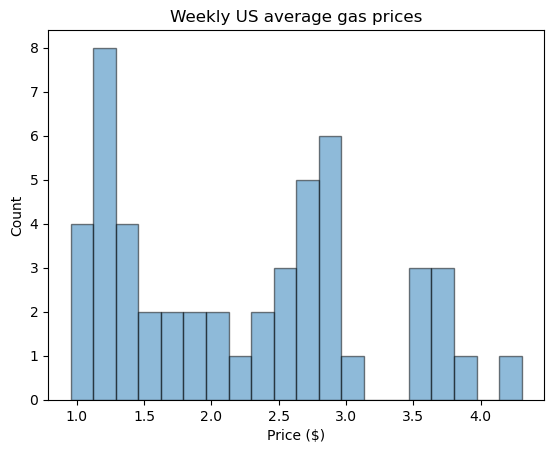

In [65]:
plt.hist(prices["Gas"], edgecolor = "black", bins = 20, alpha = .5);
plt.xlabel("Price ($)");
plt.ylabel("Count");
plt.title("Weekly US average gas prices");

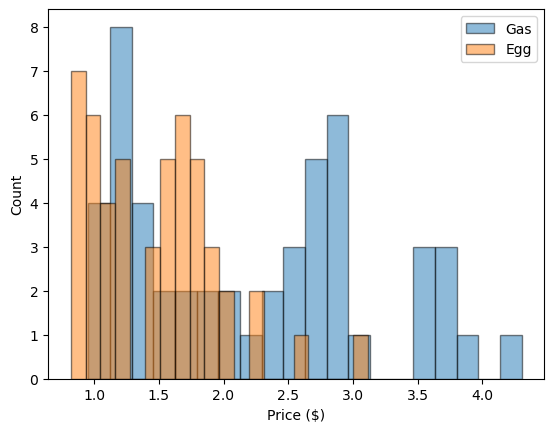

In [66]:
plt.hist(prices["Gas"], edgecolor = "black", bins = 20, alpha = .5, label = "Gas");
plt.hist(prices["Eggs"], edgecolor = "black", bins = 20, alpha = .5, label = "Egg");
plt.xlabel("Price ($)");
plt.ylabel("Count");
plt.legend();

### Boxplots

We can create boxplots using the `plt.boxplot()` function. 


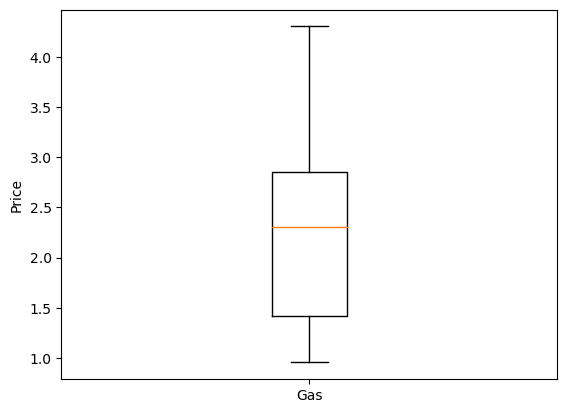

In [67]:
# boxplot of gas prices
plt.boxplot(prices["Gas"], labels = ["Gas"]);
plt.ylabel("Price");

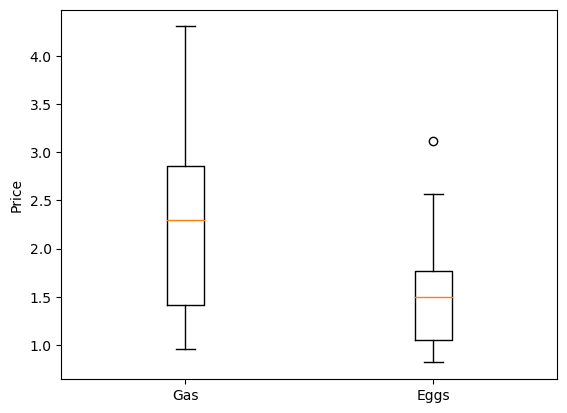

In [68]:
# creating side-by-side boxplots by passing a list of the different data sets to compare
plt.boxplot([prices["Gas"], prices["Eggs"]], labels = ["Gas", "Eggs"]);
plt.ylabel("Price");

### Scatter plots

We can create simple scatter plots using: `plt.plot()`

For more complex scatter plots we can use: `plot.scatter()`

Let's start by looking at the simple `plt.plot()`

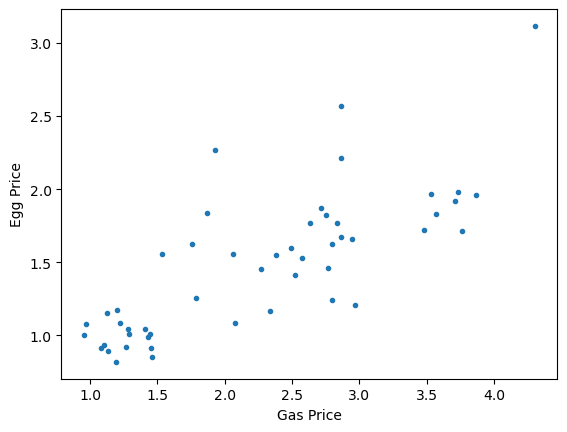

In [69]:
# Create a basic scatter plot of Egg prices vs. Gas prices using plt.plot()
plt.plot(prices["Gas"], prices["Eggs"], ".");
plt.xlabel("Gas Price");
plt.ylabel("Egg Price");

Let's now join wheat prices on to our data so we can experiment with plotting additional visual features.


In [70]:
# load the wheat prices
wheat_prices = pd.read_csv("monthly_wheat_prices.csv", parse_dates = [0])

# merge them on to the prices DataFrame
prices2 = (prices
           .merge(wheat_prices, how = "left", left_on = "Week", right_on = "DATE")
           .drop("DATE", axis = 1)
           .rename(columns = {"Price": "Wheat"})
          )

# Add a column called "after2000" which has values that are 
# "red" is years after 2000,  "green" is years before 2000
prices2["after2000"] = "red"
prices2.loc[12:, "after2000"] = "green"

prices2.head()

,Week,Eggs,Gas,Wheat,after2000
0,1993-11-01,0.917,1.084,146.501602,red
1,1994-08-01,0.895,1.130,146.024124,red
2,1995-05-01,0.819,1.194,158.611557,red
3,1996-01-01,1.155,1.129,196.428302,red
4,1996-04-01,1.086,1.223,239.516216,red


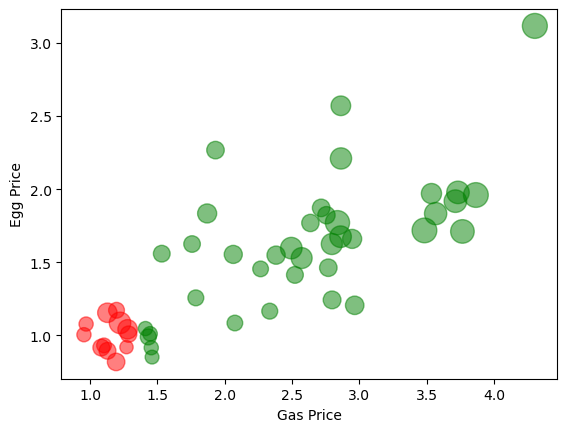

In [71]:
# Create a fancier scatter plot of Egg prices vs. Gas prices using plt.scatter()
plt.scatter(prices2["Gas"], prices2["Eggs"], 
            s = prices2["Wheat"], 
            color = prices2["after2000"], 
            alpha = .5);

plt.xlabel("Gas Price");
plt.ylabel("Egg Price");

### Bar plots and pie charts

We can plot *categorical data* using bar plots and pie charts. 

To create bar plots we can use: `plt.bar()`

To create pie charts we can use: `plt.pie()`


In [72]:
position_counts = nba_salaries.groupby("POSITION").agg(num_players = ("PLAYER", "count")).reset_index()
position_counts

,POSITION,num_players
0,C,69
1,PF,85
2,PG,85
3,SF,82
4,SG,96


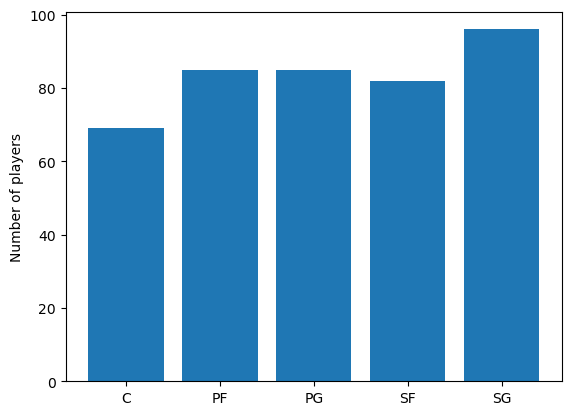

In [73]:
# Create a bar plot of the number of basketball players at each position
plt.bar(position_counts["POSITION"], position_counts["num_players"]);
plt.ylabel("Number of players");

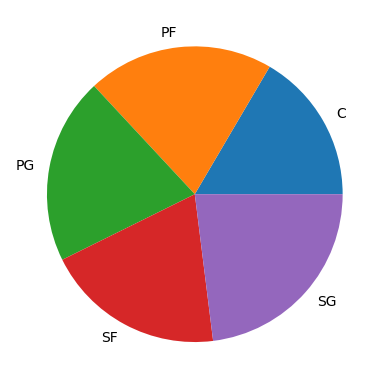

In [74]:
# Create a pie char of the number of basketball players at each position

plt.pie(position_counts["num_players"], labels= position_counts["POSITION"]);


### Subplots 

We can create subplots using: `plt.subplot(num_rows, num_cols, curr_plot_num);`



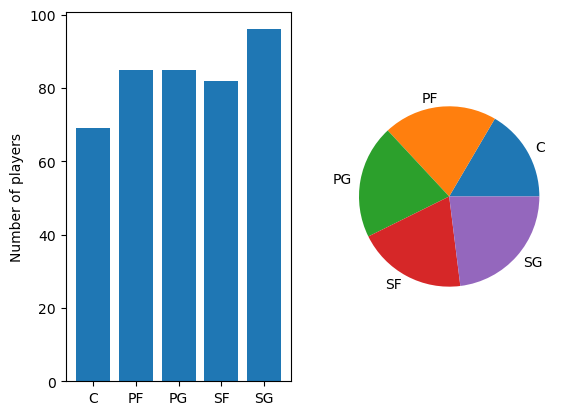

In [75]:
# subplots
plt.subplot(1, 2, 1);
plt.bar(position_counts["POSITION"], position_counts["num_players"]);
plt.ylabel("Number of players");

plt.subplot(1, 2, 2);
plt.pie(position_counts["num_players"], labels= position_counts["POSITION"]);



<br>
<br>
<br>
<br>
<br>


![piechart](http://i.imgur.com/wsVTukr.jpg)
